In [10]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [1]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset

2025-01-31 10:39:14.145123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'
yaml_path3 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
yaml_path4 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_004.yaml'
yaml_path5 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_005.yaml'
yaml_path6 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'
yaml_path7 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_007.yaml'
yaml_path8 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_008.yaml'
yaml_path9 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_009.yaml'


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [3]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [4]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [5]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [6]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path9]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [7]:
models = model_manager.create_models(yamls)

In [8]:
model_manager.train(models, [(randomized_train_dataset, randomized_val_dataset)], save_after_training=True)

INFO:root:Training model '1d9e8531fb7e363f75d34f7e65629319' for 20 epochs with batch size 32.


ValueError: Training feature array has 177 features, but the model expects 176.

Assess Performance

In [79]:
predictions = models[0].predict(validation_dataset.examples, return_target_labels=True)

In [80]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

{'mse_A': 199.85767,
 'mse_B': 214.55891,
 'mae_A': 11.397134,
 'mae_B': 11.847803,
 'combined_mse': 207.20831,
 'combined_mae': 11.622468,
 'accuracy': 0.6025137470542027,
 'precision': 0.6025137470542027,
 'recall': 1.0,
 'f1': 0.7519607843137256,
 'auc': 0.5088134047235006}

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




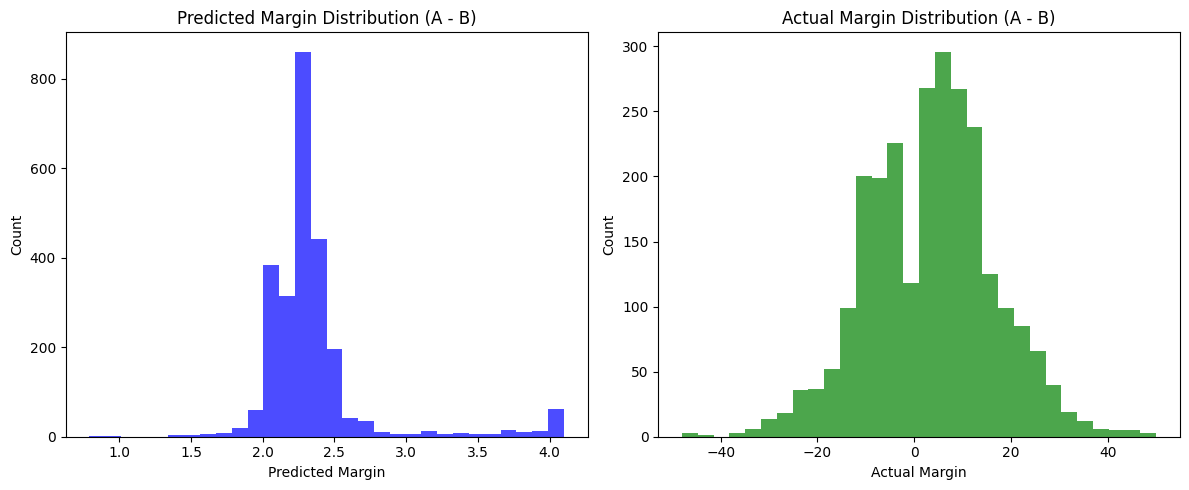

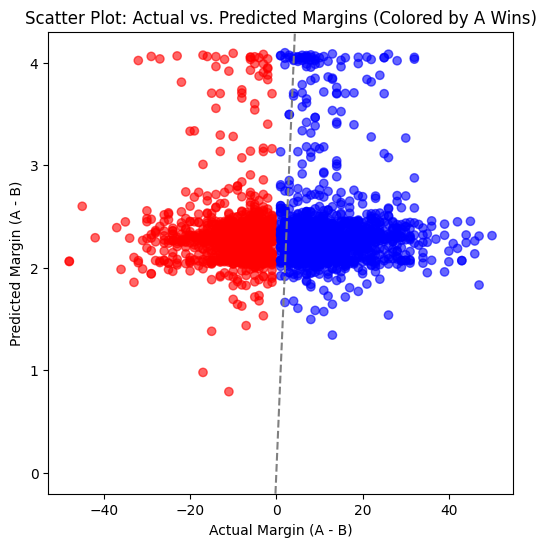

In [84]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

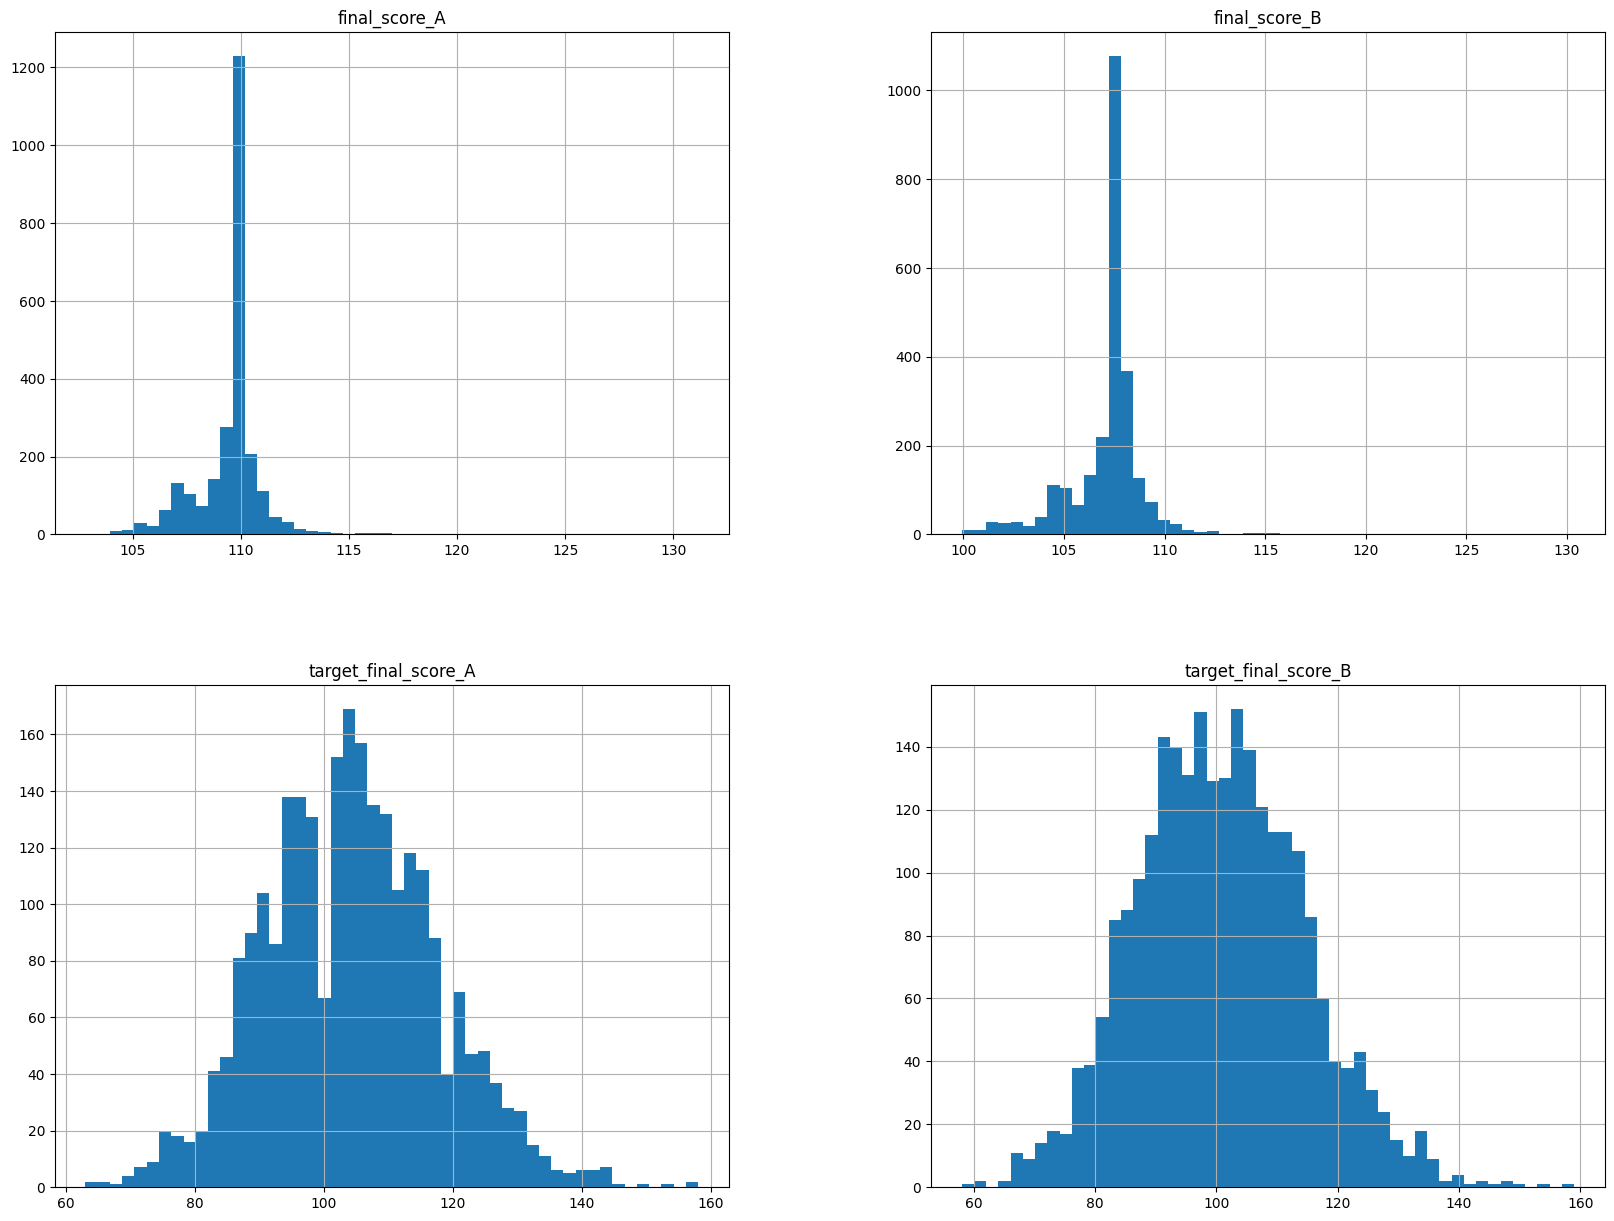

In [81]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [82]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,110.140999,108.066948,100.0,90.0
1,108.860970,106.438553,113.0,85.0
2,109.951942,107.792892,92.0,84.0
3,109.833252,107.641594,100.0,89.0
4,111.040443,108.987335,105.0,113.0
...,...,...,...,...
2541,107.080238,104.606339,101.0,112.0
2542,109.914566,107.710251,95.0,98.0
2543,108.566536,106.129494,99.0,100.0
2544,109.760521,107.445229,124.0,105.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs

CROSS VALIDATION ALTERNATIVE

Create and Train Models Using KFold Cross Validation

In [24]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path3]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

Get Averaged Metrics for KFold

In [ ]:
avg_metrics = cross_val_train(model_manager=model_manager, yamls=yamls, train_dataset=train_dataset, n_splits=5)
f1 = compute_f1(avg_metrics["val_precision"], avg_metrics["val_recall"])
print(avg_metrics)
print(f1)